# DSCI 521
## Data Exploration

In this notebook, I explore the data collected in "DataCollection" by making graphs and understanding the content of the data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path =  '/content/gdrive/My Drive/DSCI521/project-final/'
data = pd.read_csv(path+ 'data/BillboardData2.csv',index_col= 0) #downloading data 
data.dropna(inplace = True)
data

,Song,Artist,Year,SongID,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,artist_popularity,artist_genres,top_genre,genre_code,top10,top5
0,TiK ToK,Ke$ha,2010,0HPD5WQqrq7wPWR7P7Dw1i,0.09910,0.755,199693,0.837,0.000000,2,0.2890,-2.718,0.1420,120.028,4,0.714,82,"dance pop,electropop,pop,post-teen pop",pop,36,1,1
1,Need You Now,Lady Antebellum,2010,11EX5yhxr9Ihl3IN1asrfK,0.09270,0.587,277573,0.622,0.000636,4,0.2000,-5.535,0.0303,107.943,4,0.231,74,"contemporary country,country,country dawn,coun...",contemporary country,12,1,1
2,"Hey, Soul Sister",Train,2010,4HlFJV71xXKIGcU3kRyttv,0.18500,0.673,216773,0.886,0.000000,1,0.0826,-4.440,0.0431,97.012,4,0.795,78,"dance pop,neo mellow,pop,pop rock,post-teen pop",pop,36,1,1
3,California Gurls,Katy Perry Featuring Snoop Dogg,2010,6tS3XVuOyu10897O3ae7bi,0.00446,0.791,234653,0.754,0.000000,0,0.1630,-3.729,0.0569,125.014,4,0.425,88,"dance pop,pop,post-teen pop",pop,36,1,1
4,OMG,Usher Featuring will.i.am,2010,1bM50INir8voAkVoKuvEUI,0.19800,0.781,269493,0.745,0.000011,4,0.3600,-5.810,0.0332,129.998,4,0.326,84,"atl hip hop,dance pop,pop,r&b,south carolina h...",pop,36,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,More Than My Hometown,Morgan Wallen,2020,0eBXyY4SatzpE7opnzgXvz,0.60100,0.621,216573,0.882,0.000000,6,0.1320,-5.010,0.0459,126.014,4,0.574,88,contemporary country,contemporary country,12,0,0
1094,Lovin' On You,Luke Combs,2020,0nYvjcSlCgjcwogQAwIwNp,0.00165,0.572,194867,0.949,0.000195,4,0.1630,-4.865,0.0600,118.974,4,0.530,85,contemporary country,contemporary country,12,0,0
1095,Said Sum,Moneybagg Yo,2020,3sKz6Sd72K0ofPWcJPPk6H,0.01850,0.929,155168,0.667,0.000000,8,0.1000,-6.789,0.3530,126.998,4,0.274,84,"hip hop,memphis hip hop,rap,southern hip hop,t...",rap,42,0,0
1096,Slide,H.E.R. Featuring YG,2020,2rTnVB1bvwxHtaIl4uVu7f,0.08070,0.827,238321,0.469,0.000008,10,0.2070,-9.141,0.3410,97.028,4,0.196,83,"alternative r&b,dance pop,pop,r&b",pop,36,0,0


## Getting general idea of dataset 
This section is the same as the project proposal I submitted. It was to get an overall idea of the dataset and look at the songs as a whole. 

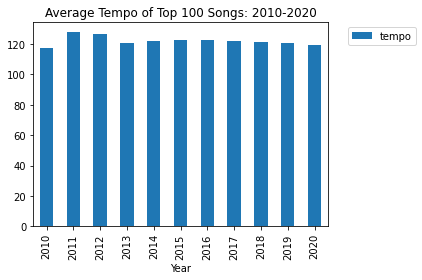

In [3]:
data.groupby("Year")[['tempo']].mean().plot.bar()
plt.title('Average Tempo of Top 100 Songs: 2010-2020')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(path + 'figures/AvgTempo.png')
plt.show()

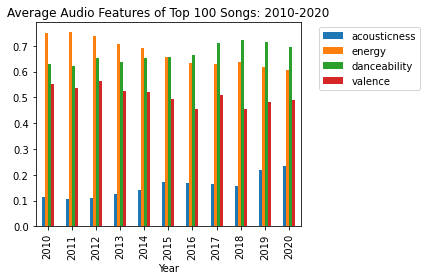

In [4]:
data.groupby("Year")[['acousticness','energy','danceability','valence']].mean().plot.bar()
plt.title('Average Audio Features of Top 100 Songs: 2010-2020')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(path + 'figures/AvgAudio.png')
plt.show()

We can see how acousticness has increased over the years. In addition, the energy of songs has decreased. Danceability and valence don't seem to follow a pattern

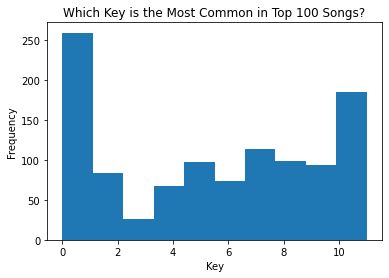

In [5]:
data[['key']].plot.hist(legend = None)
plt.title('Which Key is the Most Common in Top 100 Songs?')
plt.xlabel('Key')
plt.show()

Songs with key = 0 (aka key of C) are most common in this list and a key of 2 (aka key of D) are the least common.

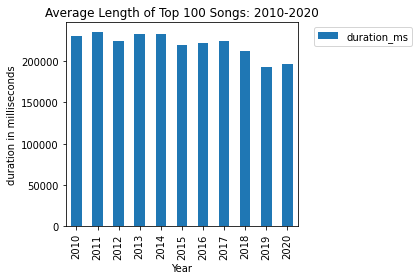

In [6]:
data.groupby("Year")[['duration_ms']].mean().plot.bar()
plt.title('Average Length of Top 100 Songs: 2010-2020')
plt.ylabel('duration in milliseconds')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(path + 'figures/AvgLength.png')
plt.show()

We also see that the average duration of songs has decreased over the past 10 years.

In [7]:
max_ = data.groupby("Artist")[['Song']].count().max()
data.groupby("Artist")[['Song']].count()[data.groupby("Artist")[['Song']].count() == max_].dropna()


,Song
Artist,
Drake,17.0


Drake has been featured on the top 100 the most of any artist--17 times.

## Comparing Top 10 Songs in the Hot 100
For this project, I specifically look at the top 10 songs in the hot 100 and how they compare to the other 90 songs. In the analysis file, I try to predict which songs are in the top 10. For now, we can compare the two groups of songs visually. 

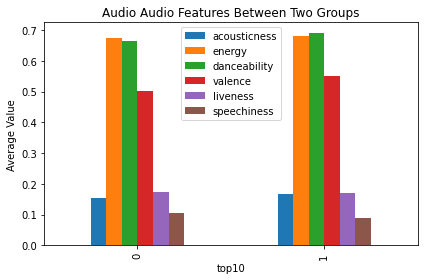

In [8]:
data.groupby('top10')[['acousticness','energy','danceability','valence','liveness','speechiness']].mean().plot.bar()
plt.title("Audio Audio Features Between Two Groups")
plt.ylabel("Average Value")
plt.tight_layout()
plt.savefig(path + 'figures/two_audio.png')
plt.show()

We see that the difference between the two groups are minimal. The most noticable is that the valence is higher for top 10 songs. Note that they are about the same in range so they are on the same axes. 

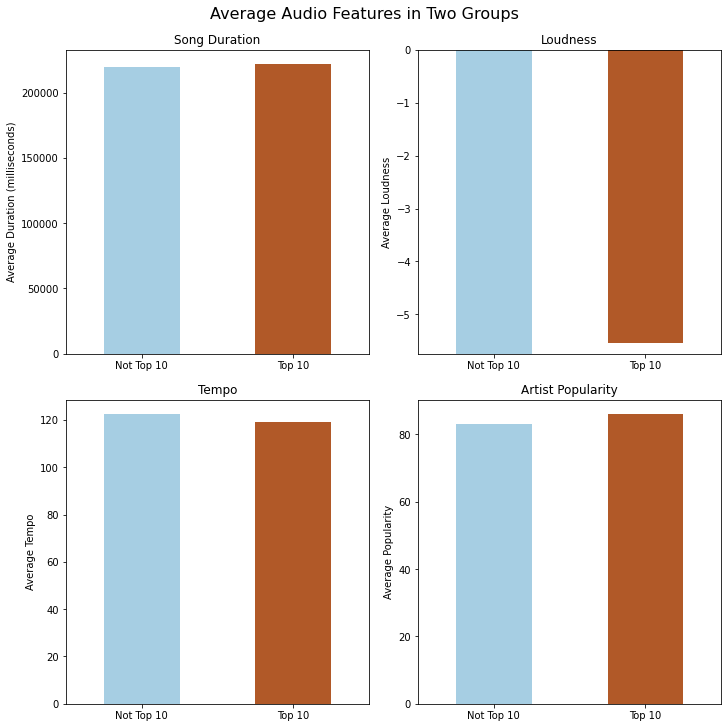

In [9]:
fig, axs = plt.subplots(2, 2, constrained_layout=True,figsize=(10, 10))
fig.suptitle('Average Audio Features in Two Groups', fontsize=16)

df = pd.DataFrame([{i:data.groupby('top10')[['duration_ms']].mean().iloc[i].values[0]} for i in range(2)])
df.plot(kind='bar', stacked=True, colormap='Paired',ax = axs[0,0],legend = None,rot=0)
axs[0,0].set_title("Song Duration")
axs[0,0].set_ylabel("Average Duration (milliseconds)")
axs[0,0].set_xticklabels(['Not Top 10','Top 10'])


df = pd.DataFrame([{i:data.groupby('top10')[['loudness']].mean().iloc[i].values[0]} for i in range(2)])
df.plot(kind='bar', stacked=True, colormap='Paired',ax = axs[0,1],legend = None,rot=0)
axs[0,1].set_title("Loudness")
axs[0,1].set_ylabel("Average Loudness")
axs[0,1].set_xticklabels(['Not Top 10','Top 10'])


df = pd.DataFrame([{i:data.groupby('top10')[['tempo']].mean().iloc[i].values[0]} for i in range(2)])
df.plot(kind='bar', stacked=True, colormap='Paired',ax = axs[1,0],legend = None,rot=0)
axs[1,0].set_title("Tempo")
axs[1,0].set_ylabel("Average Tempo")
axs[1,0].set_xticklabels(['Not Top 10','Top 10'])


df = pd.DataFrame([{i:data.groupby('top10')[['artist_popularity']].mean().iloc[i].values[0]} for i in range(2)])
df.plot.bar( stacked=True, colormap='Paired',ax = axs[1,1],legend = None,rot=0)
axs[1,1].set_title("Artist Popularity")
axs[1,1].set_ylabel("Average Popularity")
axs[1,1].set_xticklabels(['Not Top 10','Top 10'])

# plt.tight_layout()
plt.savefig(path + 'figures/two_audio2.png')
plt.show()

We see that song duration and artist popularity are slightly higher in the top 10 group. Top 10 songs are also slightly less loud and have a slower tempo. (on average).

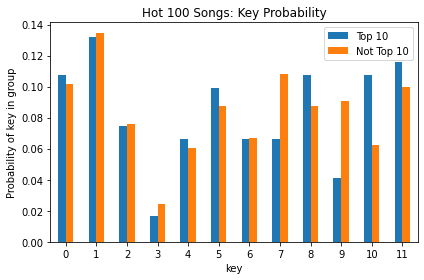

In [28]:


top10key = data[data['top10'] == 1].groupby('key').size()/sum(data[data['top10'] == 1].groupby('key').size())
not10key = data[data['top10'] == 0].groupby('key').size()/sum(data[data['top10'] == 0].groupby('key').size())
df = pd.DataFrame({'Top 10': top10key,
                   'Not Top 10': not10key}, index=not10key.index)
df.plot.bar(rot=0)
plt.title('Hot 100 Songs: Key Probability')
plt.ylabel('Probability of key in group')

plt.tight_layout()
plt.savefig(path + 'figures/two_key.png')
plt.show()

We see that key 11, 10, 8 ,5 ,4 ,2 , and 0 are more likely to be used in top 10 songs. It's interesting that key 7 and 9 are less common in top 10 songs. 

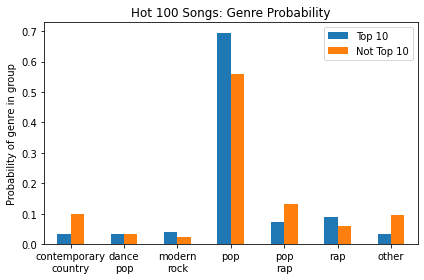

In [27]:
x = data[data['top10']==1].groupby('top_genre').size()
x = x/sum(x.to_list())
y = data[data['top10']==0].groupby('top_genre').size()
y = y/sum(y.to_list())
notPopular1 = x[x<0.01].index.to_list()
notPopular2 = y[y<0.01].index.to_list()

other1 = x[x.index.isin(notPopular1)].sum()
other2 = y[y.index.isin(notPopular2)].sum()

index1 = x[~x.index.isin(notPopular1)].index.to_list()
index2 = y[~y.index.isin(notPopular2)].index.to_list()

val1 = x[~x.index.isin(notPopular1)].to_list()
val2 = y[~y.index.isin(notPopular2)].to_list()

index1.append('other')
index2.append('other')
val1.append(other1)
val2.append(other2)

plotidx = [i.replace(" ", "\n") for i in index1]

df = pd.DataFrame({'Top 10': val1,
                   'Not Top 10': val2}, index=plotidx)
df.plot.bar(rot=0)
plt.title('Hot 100 Songs: Genre Probability')
plt.ylabel('Probability of genre in group')
plt.tight_layout()
plt.savefig(path + 'figures/two_genre.png')
plt.show()

I took the genres/number of songs to get the probability of each genre in each group. We see that rap, dance pop, and modern rock are more likely to occur in the top 10 songs. 

In [ ]:
topArtist = data[data['top10']==1].groupby('Artist')[['Song']].count().idxmax()
print("The artist who appeared the most in the Top 10 songs in the last 10 years is "+ str(topArtist[0]))
data[(data['top10']==1)&(data['Artist'] == topArtist[0])]




The artist who appeared the most in the Top 10 songs in the last 10 years is Bruno Mars


,Song,Artist,Year,SongID,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,artist_popularity,artist_genres,top_genre,genre_code,top10,top5
105,Grenade,Bruno Mars,2011,4lLtanYk6tkMvooU0tWzG8,0.146,0.706,223253,0.558,0.0,2,0.1180,-7.237,0.0593,110.443,4,0.227,94,"dance pop,pop",pop,36,1,0
306,When I Was Your Man,Bruno Mars,2013,0nJW01T7XtvILxQgC5J7Wh,0.932,0.612,213827,0.280,0.0,0,0.0880,-8.648,0.0434,72.795,4,0.387,94,"dance pop,pop",pop,36,1,0
309,Locked Out Of Heaven,Bruno Mars,2013,3w3y8KPTfNeOKPiqUTakBh,0.049,0.726,233478,0.698,0.0,5,0.3090,-4.165,0.0431,143.994,4,0.867,94,"dance pop,pop",pop,36,1,0
700,That's What I Like,Bruno Mars,2017,0KKkJNfGyhkQ5aFogxQAPU,0.013,0.853,206693,0.560,0.0,1,0.0944,-4.961,0.0406,134.066,4,0.860,94,"dance pop,pop",pop,36,1,1


In the top 10 songs, we see that Bruno mars has had 4 songs in this tier-- the most for any artist. 